# Last Version for Data Analysis  

This attempt:  
- Uses different dependent variables. Every trust value is a DV. Not aggregated.  
- Multivariate model with Level 1 (year) and Level 2 (country):  
   - **Level 1**: Country-Year (e.g., Germany in 2004, Germany in 2006).  
   - **Level 2**: Country (repeated observations over time).  
- Since countries are measured across multiple years, observations are nested within countries over time:  
   - Countries (Level 2) are the "clusters."  
   - Years (or country-year pairs) are repeated observations (Level 1).  
- Use a **random intercept model** to account for differences in baseline outcomes across countries.  

---

Each trust measure is treated as a **separate dependent variable** \( Y_{ijk} \):  

$$
Y_{ijk} = \beta_0 + \beta_1 \text{Disinformation}_{jk} + \beta_2 \text{GDP}_{jk} + u_{0j} + \epsilon_{ijk}
$$  

---

### Where:  
- \( Y_{ijk} \): Trust score for trust measure \( i \) in country \( j \) at year \( k \).  
- \( \beta_0 \): Overall intercept.  
- \( \beta_1 \): Fixed effect of foreign disinformation predictors (e.g., \( e\_pt\_coup \), \( e\_civil\_war \)).  
- \( \beta_2 \): Fixed effect of additional controls (e.g., GDP).  
- \( u_{0j} \): Random intercept for each country \( j \), capturing country-specific baseline trust.  
- \( \epsilon_{ijk} \): Residual error.  

---

## Key Variables:  
- **Dependent variables**: Trust measures (`trstlgl`, `trstplc`, `trstplt`, `trstprl`, `trstprt`).  
- **Predictor**: Foreign disinformation indicators (`v2smfordom`).  
- **Grouping variables**: Country, Year.  

---

## Control Variables:  
- Satisfaction with the economy (`stfeco`)  
- Perceptions of corruption (`v2x_corr`)  
- Civil liberties index (`v2x_civlib`)  
- Quality of education (`v2peedueq`, Educational equality)  

---

## Interactions:  
- **Disinformation × Polarization**  (`v2smpolsoc`)
- **Disinformation × Internet Penetration**  (`Level_of_Internet_Penetration`)



### Hypothesis 1: Interaction Between Disinformation and Polarization  
The effect of foreign disinformation on institutional trust is amplified in highly polarized countries:

$$
Y_{ijk} = \beta_0 + \beta_1 \text{Disinformation}_{jk} + \beta_2 \text{Polarization}_{jk} + \beta_3 (\text{Disinformation}_{jk} \times \text{Polarization}_{jk}) + \sum \beta_c \text{Controls}_{jk} + u_{0j} + \epsilon_{ijk}
$$

---

### Hypothesis 2: Interaction Between Disinformation and Internet Penetration  
The effect of foreign disinformation on institutional trust is amplified in countries with higher internet penetration:

$$
Y_{ijk} = \beta_0 + \beta_1 \text{Disinformation}_{jk} + \beta_2 \text{Internet}_{jk} + \beta_3 (\text{Disinformation}_{jk} \times \text{Internet}_{jk}) + \sum \beta_c \text{Controls}_{jk} + u_{0j} + \epsilon_{ijk}
$$


In [66]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as sk


In [67]:
# file path
file_path = r"C:\Users\belan\bap_thesis\data\final_combined_data.csv"

# read data
data = pd.read_csv(file_path)

# check head 
print(data.head())


   Country  essround  edition          idno   dweight   pspwght   pweight  \
0  Austria       1.0      6.7   1974.660116  1.002188  1.001945  0.271487   
1  Austria       2.0      3.6   2195.380610  0.998871  1.000062  0.302006   
2  Austria       3.0      3.7   2739.529561  1.002158  1.002636  0.289116   
3  Austria      10.0      3.1  33827.132200  0.999378  0.998530  0.381786   
4  Austria       7.0      2.3   1771.912388  1.000047  1.000023  0.406019   

   anweight     prob    stratum  ...   e_wb_pop  e_pechmor  e_miinteco  \
0  0.272016      NaN        NaN  ...  8081957.0       5.31         NaN   
1       NaN      NaN        NaN  ...  8171966.0       5.05         NaN   
2       NaN      NaN        NaN  ...  8268641.0       4.76         NaN   
3  0.381225  0.00084  59.960941  ...  8321496.0       4.54         NaN   
4  0.406028      NaN        NaN  ...  8546356.0       3.80         NaN   

   e_civil_war  e_miinterc  e_pt_coup  e_pt_coup_attempts  \
0          0.0         NaN     

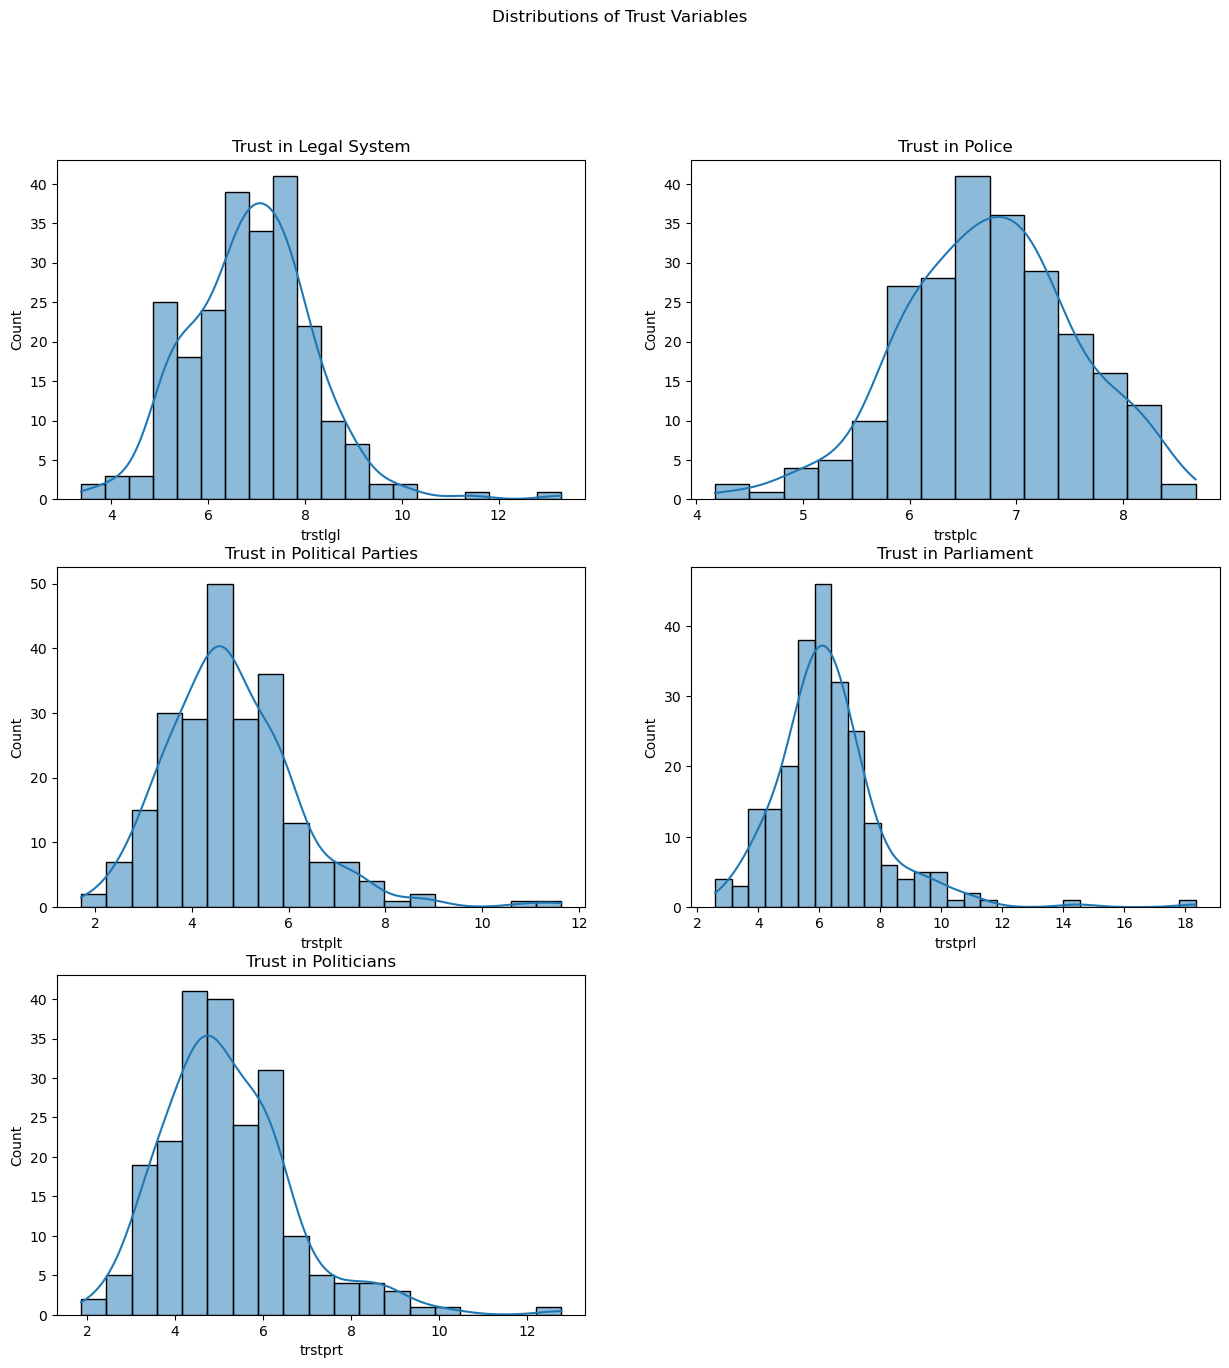

In [68]:
# show the distributions of the dependent variables
# trstlgl`, `trstplc`, `trstplt`, `trstprl`, `trstprt`

trust_vars = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt']

# change names for better readability
trust_vars_names = ['Trust in Legal System', 'Trust in Police', 'Trust in Political Parties', 'Trust in Parliament', 'Trust in Politicians']

# plot the distributions
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Distributions of Trust Variables')
for i, ax in enumerate(axs.flatten()):
    if i < 5:
        sns.histplot(data[trust_vars[i]], ax=ax, kde=True)
        ax.set_title(trust_vars_names[i])
    else:
        ax.set_visible(False)
plt.show()



Summary Statistics for Trust in Legal System:


,mean,std,min,25%,50%,75%,max
Country,,,,,,,
Austria,7.144879,0.363745,6.658488,6.890985,7.085351,7.437086,7.688345
Belgium,5.478368,0.353758,5.100642,5.186985,5.274432,5.707771,6.124216
Bulgaria,5.962947,1.264191,3.932178,5.566748,5.881025,6.792401,7.525275
Croatia,4.256224,0.705694,3.372029,3.851240,4.272169,4.549775,5.235907
Cyprus,6.738700,1.106012,5.065301,6.029157,7.138816,7.435629,7.895431
Czechia,5.525137,0.511488,4.820567,5.190644,5.664750,5.908428,6.102058
Denmark,8.593572,0.297437,8.276298,8.391300,8.487940,8.782016,9.111583
Estonia,8.261124,1.455346,7.053600,7.355844,7.630012,8.972549,11.385947
Finland,7.650846,0.140628,7.462933,7.511048,7.681472,7.753252,7.851683


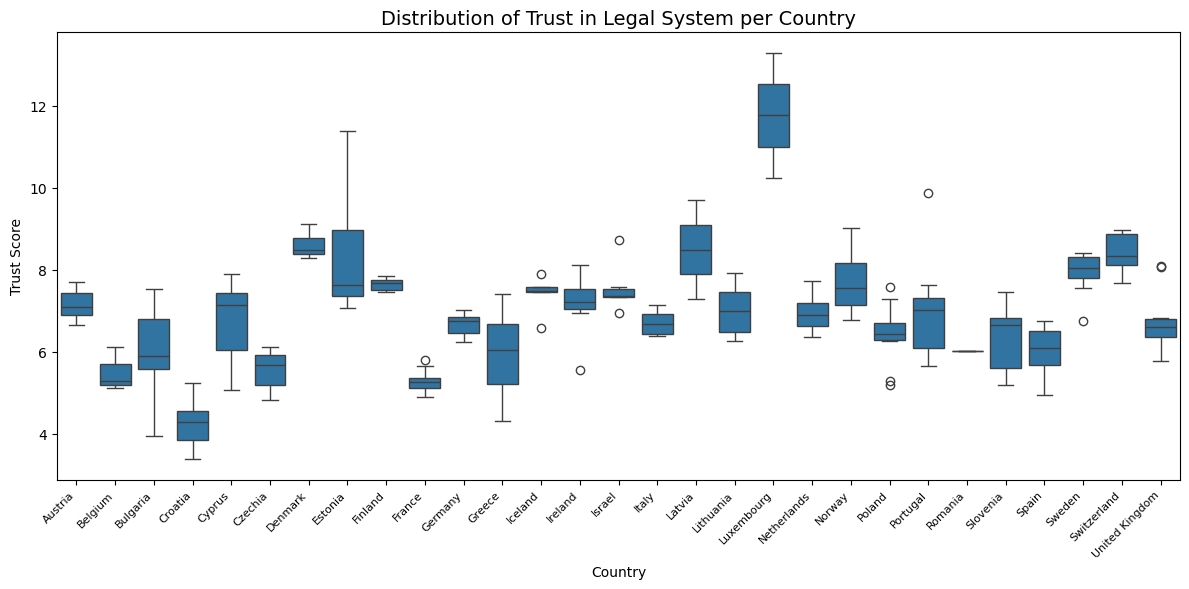

Summary Statistics for Trust in Police:


,mean,std,min,25%,50%,75%,max
Country,,,,,,,
Austria,7.034216,0.328674,6.543537,6.830862,6.983907,7.277760,7.495196
Belgium,6.278251,0.266333,5.922860,6.108861,6.150235,6.520785,6.722083
Bulgaria,5.013743,0.699098,4.176688,4.570281,4.961643,5.276522,6.161172
Croatia,5.592938,0.246760,5.233970,5.492053,5.595588,5.820343,5.822736
Cyprus,5.974933,0.411723,5.447214,5.648204,6.050480,6.236875,6.488307
Czechia,5.891304,0.523735,5.153808,5.693679,5.827509,6.190654,6.818476
Denmark,8.094328,0.216720,7.831677,7.946032,8.077873,8.205778,8.490223
Estonia,7.387069,0.573430,6.595797,7.180708,7.229637,7.595158,8.678717
Finland,8.188554,0.134743,7.972675,8.093573,8.254991,8.291460,8.337563


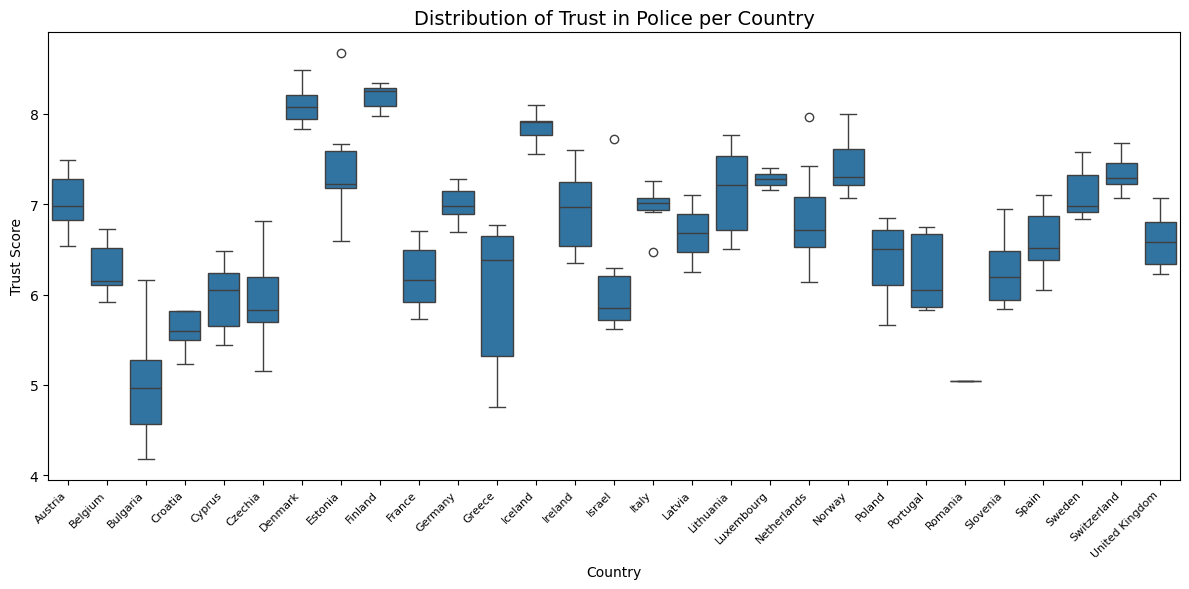

Summary Statistics for Trust in Politicians:


,mean,std,min,25%,50%,75%,max
Country,,,,,,,
Austria,4.469052,0.595597,3.412619,4.320644,4.436078,4.621221,5.584868
Belgium,4.710316,0.362007,4.206573,4.491026,4.579764,4.809525,5.447856
Bulgaria,3.340689,0.517670,2.448212,3.161855,3.449749,3.746685,3.784868
Croatia,2.858758,0.498934,2.110558,2.702633,3.003814,3.012255,3.464529
Cyprus,5.175302,1.377821,3.557185,4.410147,4.745999,6.052757,7.216090
Czechia,3.935071,0.673002,2.919861,3.508048,3.942503,4.478525,4.782156
Denmark,6.332632,0.574631,5.773537,5.929240,6.183112,6.543181,7.492920
Estonia,5.189148,1.042596,4.195015,4.543467,4.681030,5.556863,6.975118
Finland,5.399463,0.310046,4.909563,5.145601,5.469610,5.654690,5.772032


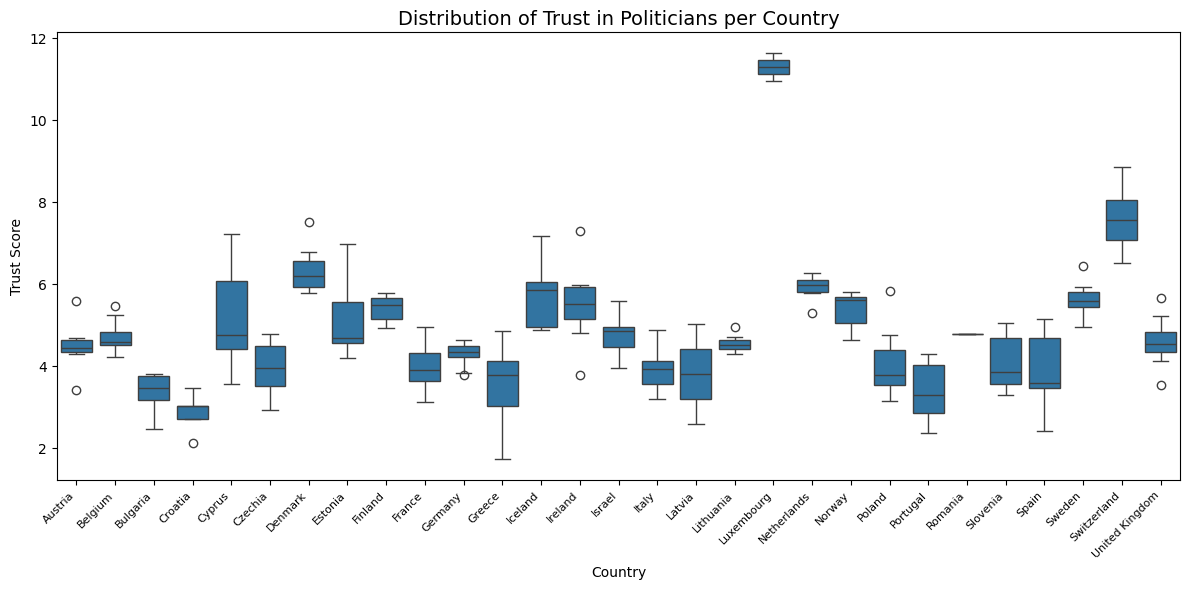

Summary Statistics for Trust in Parliament:


,mean,std,min,25%,50%,75%,max
Country,,,,,,,
Austria,6.493852,0.794553,5.329995,5.999476,6.344773,7.086942,7.751689
Belgium,6.226164,1.298183,5.519886,5.591368,5.639298,6.257357,10.008999
Bulgaria,3.613093,0.404760,3.031699,3.380030,3.602302,3.963614,4.052266
Croatia,3.851252,0.667010,2.957435,3.477941,4.034106,4.061666,4.725112
Cyprus,6.637874,1.628047,4.658358,5.342413,6.679671,7.825581,8.705332
Czechia,5.128618,0.842016,4.161659,4.300302,5.180901,5.788104,6.399514
Denmark,7.155132,0.326362,6.509987,7.112228,7.291033,7.346976,7.407453
Estonia,5.980098,1.022825,5.158566,5.250632,5.420914,6.725490,8.086079
Finland,6.338745,0.325586,5.780800,6.154941,6.363377,6.612548,6.688420


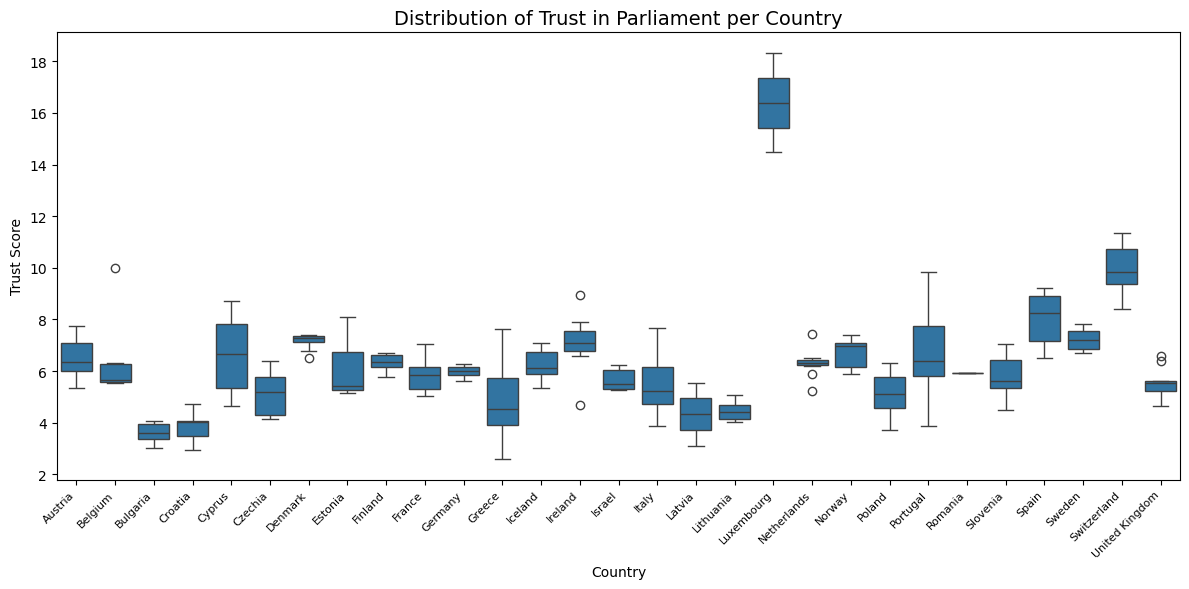

Summary Statistics for Trust in Political Parties:


,mean,std,min,25%,50%,75%,max
Country,,,,,,,
Austria,4.655803,0.643022,3.600901,4.468387,4.638951,4.826893,5.760208
Belgium,4.755908,0.356017,4.347418,4.502689,4.677747,4.861564,5.380176
Bulgaria,3.814627,0.602811,2.678953,3.729353,4.029029,4.141842,4.341841
Croatia,3.305378,0.599849,2.490879,2.974310,3.380165,3.631740,4.049795
Cyprus,5.228894,1.444458,3.249267,4.561266,4.959783,6.093305,7.304958
Czechia,4.063134,0.658329,3.240796,3.537260,4.065267,4.563895,5.044048
Denmark,7.062127,0.622313,6.444740,6.674191,6.905590,7.284135,8.167903
Estonia,5.861792,1.327175,4.458442,4.763930,5.133530,6.700840,8.033605
Finland,5.858561,0.374307,5.151767,5.717915,5.896268,6.061930,6.471754


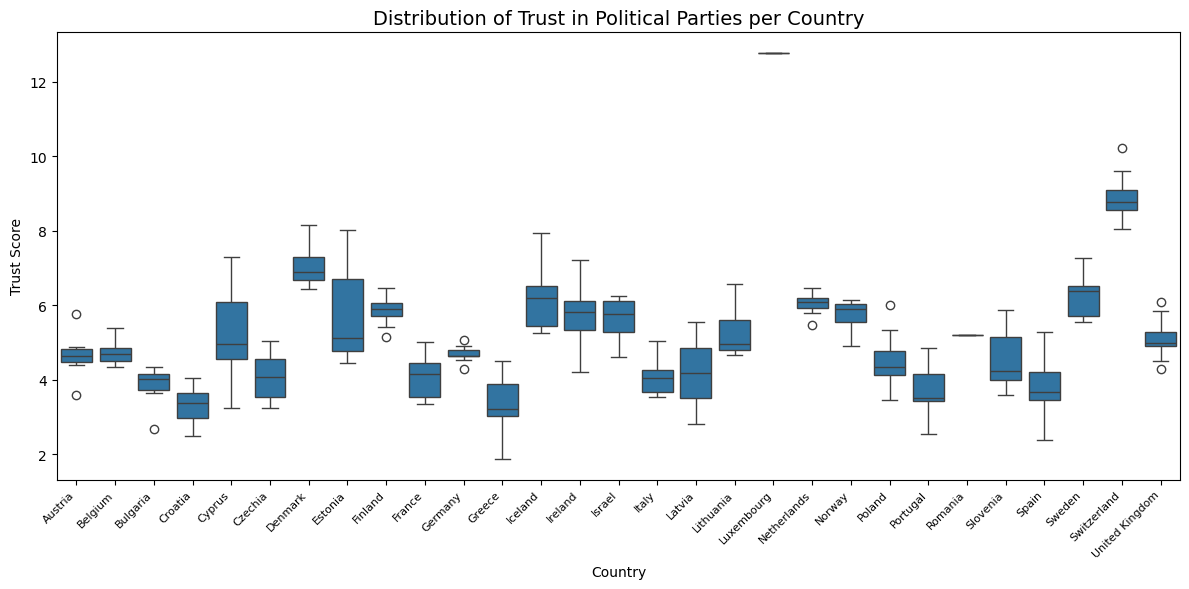

In [69]:
# Define trust variables and their readable names
trust_vars = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt']
trust_vars_names = [
    'Trust in Legal System',
    'Trust in Police',
    'Trust in Politicians',
    'Trust in Parliament',
    'Trust in Political Parties'
]

# Loop through each trust variable and create enhanced plots
for i in range(len(trust_vars)):
    plt.figure(figsize=(12, 6))  # Create a new figure
    sns.boxplot(x='Country', y=trust_vars[i], data=data
                )
    
    # Calculate key statistics
    summary_stats = data.groupby('Country')[trust_vars[i]].describe()
    print(f"Summary Statistics for {trust_vars_names[i]}:")
    display(summary_stats[['mean', 'std', 'min', '25%', '50%', '75%', 'max']])
    
    plt.title(f'Distribution of {trust_vars_names[i]} per Country', fontsize=14)
    plt.xlabel('Country', fontsize=10)
    plt.ylabel('Trust Score', fontsize=10)
    plt.xticks(rotation=45, ha="right", fontsize=8)  # Rotate x-axis labels
    plt.tight_layout()  # Adjust spacing
    plt.show()  # Show the figure

In [70]:
# exclude luxembourg due to missing data
data = data[data['Country'] != 'Luxembourg']


In [71]:
import pandas as pd

# Create a summary table with country as rows and trust factor means as columns
trust_means_table = data.groupby('Country')[['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt']].mean()

# Rename columns for clarity
trust_means_table.columns = ['Trust in Legal System', 
                             'Trust in Police', 
                             'Trust in Politicians', 
                             'Trust in Parliament', 
                             'Trust in Political Parties']

# Display the table
trust_means_table = trust_means_table.round(2)  # Round to 2 decimal places for cleaner output
print(trust_means_table)


                Trust in Legal System  Trust in Police  Trust in Politicians  \
Country                                                                        
Austria                          7.14             7.03                  4.47   
Belgium                          5.48             6.28                  4.71   
Bulgaria                         5.96             5.01                  3.34   
Croatia                          4.26             5.59                  2.86   
Cyprus                           6.74             5.97                  5.18   
Czechia                          5.53             5.89                  3.94   
Denmark                          8.59             8.09                  6.33   
Estonia                          8.26             7.39                  5.19   
Finland                          7.65             8.19                  5.40   
France                           5.28             6.19                  3.97   
Germany                          6.67   

In [72]:
# Precalculated means from your summary statistics (replace with actual values)
trust_means = {
    'Country': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
                'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
                'Iceland', 'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania',
                'Netherlands', 'Norway', 'Poland', 'Portugal', 
                'Romania', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'UK'],
    'Trust in Legal System': [7.14, 5.48, 5.96, 4.26, 6.74, 5.53, 8.59, 8.26, 7.65, 5.28, 6.67, 5.93, 7.40, 7.18, 7.55, 6.70, 8.49, 7.00, 6.96, 7.73, 6.41, 6.91, 6.02, 6.28, 6.03, 7.93, 8.45, 6.77],
    'Trust in Police': [7.03, 6.28, 5.01, 5.59, 5.97, 5.89, 8.09, 7.39, 8.19, 6.19, 7.01, 6.00, 7.85, 6.93, 6.17, 6.96, 6.68, 7.14, 6.85, 7.42, 6.37, 6.24, 5.04, 6.25, 6.59, 7.12, 7.36, 6.60],
    'Trust in Politicians': [4.47, 4.71, 3.34, 2.86, 5.18, 3.93, 6.33, 5.19, 5.40, 3.97, 4.27, 3.51, 5.77, 5.48, 4.75, 3.92, 3.79, 4.55, 5.91, 5.35, 4.05, 3.38, 4.78, 4.07, 3.85, 5.61, 7.61, 4.59],
    'Trust in Parliament': [6.49, 6.23, 3.61, 3.85, 6.64, 5.13, 7.16, 5.98, 6.34, 5.81, 5.99, 4.85, 6.24, 7.09, 5.66, 5.50, 4.32, 4.46, 6.30, 6.66, 5.11, 6.77, 5.93, 5.85, 8.07, 7.22, 9.96, 5.55],
    'Trust in Political Parties': [4.66, 4.76, 3.81, 3.31, 5.23, 4.06, 7.06, 5.86, 5.86, 4.08, 4.69, 3.29, 6.28, 5.70, 5.60, 4.10, 4.18, 5.28, 6.04, 5.71, 4.48, 3.68, 5.21, 4.53, 3.87, 6.28, 8.91, 5.12]
}

# Convert to DataFrame and exclude Luxembourg
trust_means_df = pd.DataFrame(trust_means)
trust_means_df = trust_means_df[trust_means_df['Country'] != 'Luxembourg']

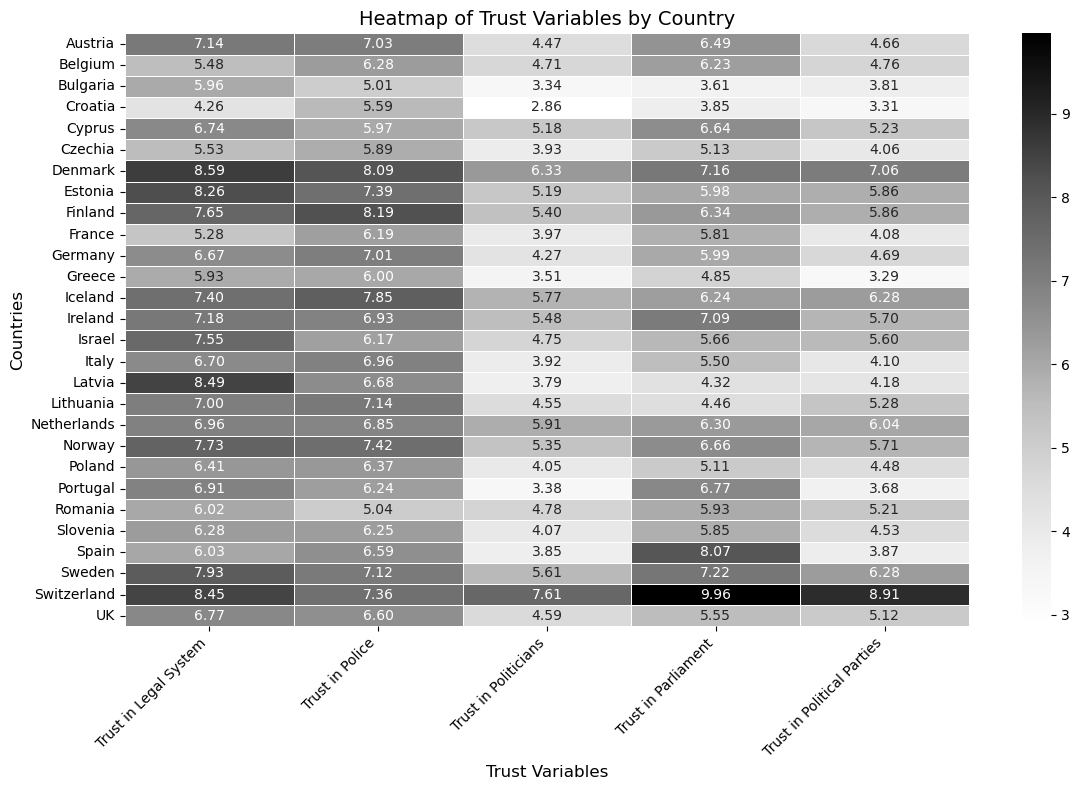

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare data for heatmap
heatmap_data = trust_means_df.set_index('Country')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='Greys', fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title("Heatmap of Trust Variables by Country", fontsize=14)
plt.xlabel("Trust Variables", fontsize=12)
plt.ylabel("Countries", fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


C:\Users\belan\AppData\Local\Temp\ipykernel_24032\2995376438.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Overall Mean', y='Trust Variable', data=trust_means_overall, palette='viridis')


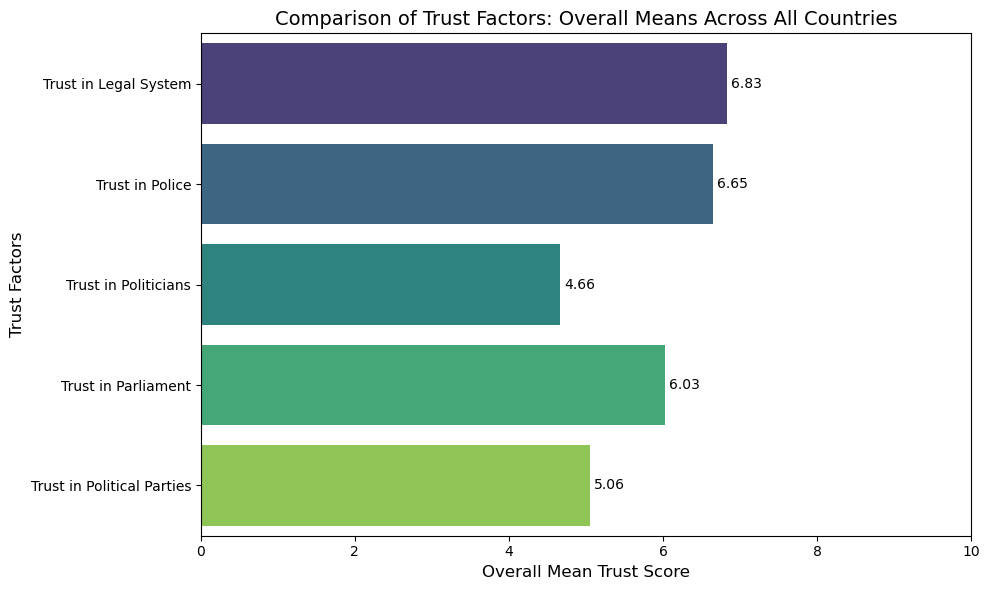

In [74]:
# Calculate the overall mean for each trust variable
trust_means_overall = trust_means_df.mean(numeric_only=True).reset_index()
trust_means_overall.columns = ['Trust Variable', 'Overall Mean']

# Rename variables to their readable names
trust_means_overall['Trust Variable'] = [
    'Trust in Legal System',
    'Trust in Police',
    'Trust in Politicians',
    'Trust in Parliament',
    'Trust in Political Parties'
]

# Plot the comparison as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Overall Mean', y='Trust Variable', data=trust_means_overall, palette='viridis')

# Add value labels to the bars
for index, value in enumerate(trust_means_overall['Overall Mean']):
    plt.text(value + 0.05, index, f'{value:.2f}', va='center', fontsize=10)

# Set titles and labels
plt.title('Comparison of Trust Factors: Overall Means Across All Countries', fontsize=14)
plt.xlabel('Overall Mean Trust Score', fontsize=12)
plt.ylabel('Trust Factors', fontsize=12)
plt.xlim(0, 10)  # Trust scores range from 0 to 10
plt.tight_layout()
plt.show()


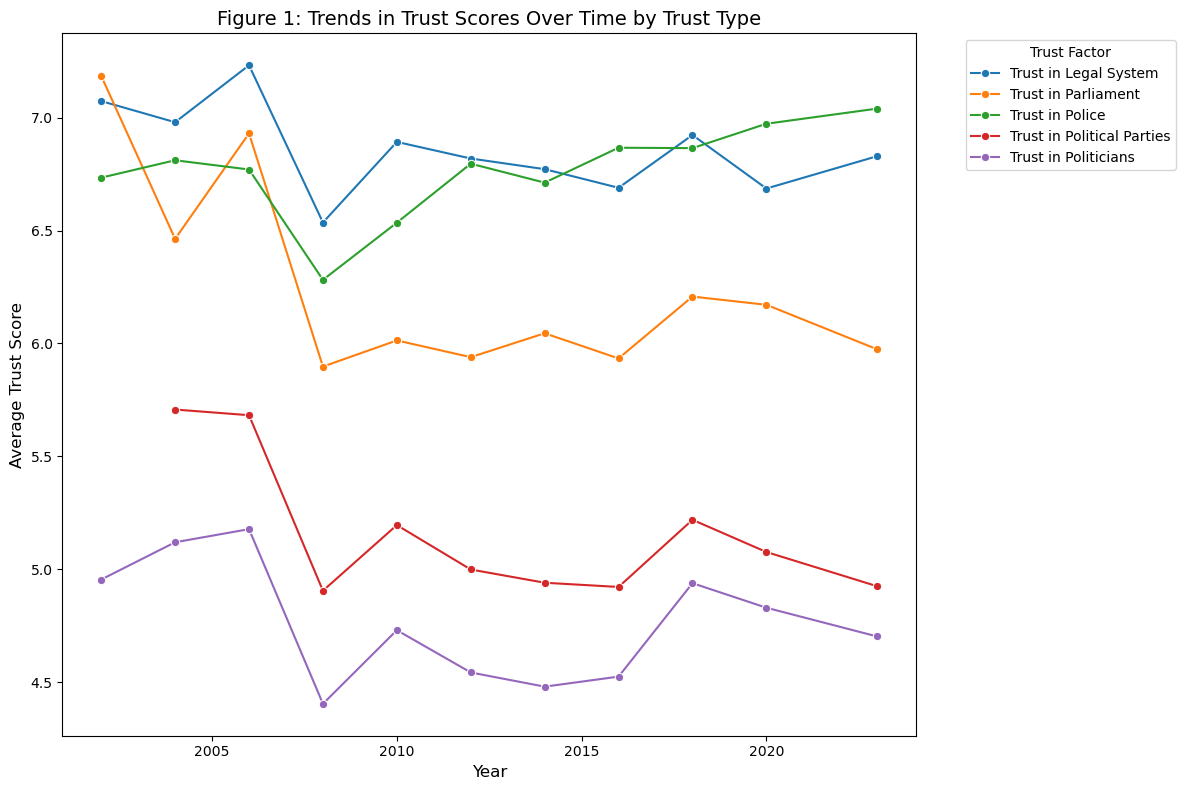

In [75]:
# Define trust variables and their readable names
trust_vars = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt']
trust_vars_names = [
    'Trust in Legal System',
    'Trust in Police',
    'Trust in Politicians',
    'Trust in Parliament',
    'Trust in Political Parties'
]

# Melt the data to reshape it for plotting
melted_data = pd.melt(data, id_vars=['Year'], 
                      value_vars=trust_vars, 
                      var_name='Trust Factor', value_name='Trust Score')

# Map readable names for trust factors
melted_data['Trust Factor'] = melted_data['Trust Factor'].replace(
    dict(zip(trust_vars, trust_vars_names))
)

# Aggregate the mean trust score per year and trust factor
mean_trust_over_time = melted_data.groupby(['Year', 'Trust Factor'], as_index=False)['Trust Score'].mean()

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=mean_trust_over_time, x='Year', y='Trust Score', hue='Trust Factor', marker='o')

# Title and labels
plt.title('Figure 1: Trends in Trust Scores Over Time by Trust Type', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Trust Score', fontsize=12)

# Adjust legend
plt.legend(title='Trust Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

-----------------------------------------------------

In [93]:
# List of variables to analyze
variables = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt', 
             'v2smfordom', 'stfeco', 'v2x_corr', 'v2x_civlib', 
             'v2peedueq', 'Level_of_Internet_Penetration', 'v2smpolsoc']

# Custom function to compute extended summary statistics
def extended_summary(df, vars_list):
    summary = pd.DataFrame()
    for var in vars_list:
        stats = {
            'Count': df[var].count(),
            'Mean': df[var].mean(),
            'Std': df[var].std(),
            'Min': df[var].min(),
            '25%': df[var].quantile(0.25),
            '50%': df[var].median(),
            '75%': df[var].quantile(0.75),
            'Max': df[var].max(),
            'Skewness': df[var].skew(),
            'Kurtosis': df[var].kurt(),
            'Missing Values': df[var].isnull().sum()
        }
        summary[var] = stats
    return summary.T

# Generate extended summary
summary_stats = extended_summary(data, variables)

# Display summary in a cleaner format
print("Summary Statistics for Selected Variables:")
display(summary_stats.round(3))

Summary Statistics for Selected Variables:


,Count,Mean,Std,Min,25%,50%,75%,Max,Skewness,Kurtosis,Missing Values
trstlgl,232.0,6.851,1.205,3.372,6.048,6.882,7.623,11.386,0.078,0.426,0.0
trstplc,232.0,6.748,0.811,4.177,6.185,6.737,7.241,8.679,-0.149,0.035,0.0
trstplt,232.0,4.754,1.229,1.713,3.895,4.631,5.584,8.854,0.524,0.621,0.0
trstprl,232.0,6.234,1.517,2.583,5.343,6.179,6.975,11.334,0.623,1.034,0.0
trstprt,232.0,5.150,1.364,1.863,4.279,5.118,5.931,10.211,0.799,1.342,0.0
v2smfordom,232.0,0.953,1.185,-3.202,0.246,0.769,1.792,3.122,-0.020,-0.354,0.0
stfeco,232.0,6.378,1.706,1.475,5.170,6.419,7.542,10.514,-0.099,-0.230,0.0
v2x_corr,232.0,0.088,0.107,0.002,0.017,0.042,0.121,0.650,2.379,6.948,0.0
v2x_civlib,232.0,0.943,0.030,0.832,0.934,0.954,0.963,0.976,-1.829,3.189,0.0
v2peedueq,232.0,2.484,0.665,0.573,2.157,2.453,3.008,3.541,-0.354,0.080,0.0


v2x_corr (Political Corruption)
- Original Scale: 0 to 1 interval scale (continuous), where:
    - 0 = No corruption
    - 1 = Complete corruption
    - Interpretation: Higher values reflect greater political corruption.

v2x_civlib (Civil Liberties Index)
- Original Scale: 0 to 1 interval scale (continuous), where:
    - 0 = No respect for civil liberties
    - 1 = Full respect for civil liberties

v2peedueq (Educational Equality)
- Original Scale: Interval scale (rescaled from V-Dem's model).
- Range in my Data: Approximately 0.5 to 3.5.
- Interpretation:
    - Higher values indicate greater educational equality.
    - Lower values reflect more significant inequalities in access to education.

v2smpolsoc (Polarization)
- Original Scale: Rescaled to an interval scale.
- Range in my Data: Approximately -3 to +3.
- Interpretation:
    - Negative values = High social polarization.
    - Positive values = Low social polarization.

In [94]:
from sklearn.impute import KNNImputer

# Select only the columns that need imputation
columns_to_impute = ['trstprt']

# Apply KNN Imputation only on the selected columns
imputer = KNNImputer(n_neighbors=5)
imputed_values = imputer.fit_transform(data[columns_to_impute])

# Replace missing values in the original DataFrame
data[columns_to_impute] = imputed_values

# Confirm missing values have been filled
print(data[columns_to_impute].isnull().sum())


trstprt    0
dtype: int64


# Start Analysis - correlation and vif

In [95]:
# Select predictors for correlation and VIF
predictors = ['v2smfordom', 'stfeco', 'v2x_corr', 'v2x_civlib', 'v2peedueq', 
              'Level_of_Internet_Penetration', 'v2smpolsoc']
data_predictors = data[predictors]

In [96]:
### 1. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data_predictors.corr()

# show the results using a table 
print(correlation_matrix)


                               v2smfordom    stfeco  v2x_corr  v2x_civlib  \
v2smfordom                       1.000000 -0.000443 -0.102494    0.258019   
stfeco                          -0.000443  1.000000 -0.224656    0.111621   
v2x_corr                        -0.102494 -0.224656  1.000000   -0.525462   
v2x_civlib                       0.258019  0.111621 -0.525462    1.000000   
v2peedueq                        0.450211  0.130416 -0.395484    0.519946   
Level_of_Internet_Penetration   -0.145754  0.222154 -0.436732    0.086139   
v2smpolsoc                      -0.004489  0.185651 -0.250628    0.534936   

                               v2peedueq  Level_of_Internet_Penetration  \
v2smfordom                      0.450211                      -0.145754   
stfeco                          0.130416                       0.222154   
v2x_corr                       -0.395484                      -0.436732   
v2x_civlib                      0.519946                       0.086139   
v2peedue

<Figure size 1000x800 with 0 Axes>

Low Correlation Overall: Most predictors show low or moderate correlation with each other. This is good because it reduces concerns about multicollinearity.

Exceptions:
- v2x_corr and e_pechmor have a moderate correlation of 0.506.
    - This suggests that countries with high corruption perceptions may also face higher political instability, which makes sense logically.
- v2smfordom and v2peedueq are correlated at 0.450, which is still manageable but worth monitoring.
- e_pechmor and Level_of_Internet_Penetration have a negative correlation of -0.585.
    - This suggests that countries with higher internet penetration tend to experience less political instability.

In [97]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Prepare the predictors
predictors = ['v2smfordom', 'stfeco', 'v2x_corr', 'v2x_civlib', 
              'v2peedueq', 'Level_of_Internet_Penetration', 'v2smpolsoc']
X = data[predictors].dropna()  # Drop missing values

# Add constant for VIF calculation
X = sm.add_constant(X)

# Calculate VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif.sort_values(by="VIF", ascending=False))


                        Variable          VIF
0                          const  2177.178961
4                     v2x_civlib     2.229901
3                       v2x_corr     1.817033
5                      v2peedueq     1.701242
7                     v2smpolsoc     1.487112
1                     v2smfordom     1.367529
6  Level_of_Internet_Penetration     1.364804
2                         stfeco     1.105803


In [102]:
# some fun scaling to improve model performance
from sklearn.preprocessing import StandardScaler

# Copy original data
data_scaled = data.copy()

# Log transform skewed variables
skewed_vars = ['v2x_corr', 'Level_of_Internet_Penetration']
for col in skewed_vars:
    data_scaled[col] = np.log1p(data_scaled[col])

# Standardize all variables
variables_to_scale = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt',
                      'v2smfordom', 'stfeco', 'v2x_corr', 'v2x_civlib',
                      'v2peedueq', 'Level_of_Internet_Penetration', 'v2smpolsoc']

scaler = StandardScaler()
data_scaled[variables_to_scale] = scaler.fit_transform(data_scaled[variables_to_scale])

# make dataframe for the scaled data
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Display the first few rows of the scaled data
print(data_scaled.head())



   Country  essround  edition          idno   dweight   pspwght   pweight  \
0  Austria       1.0      6.7   1974.660116  1.002188  1.001945  0.271487   
1  Austria       2.0      3.6   2195.380610  0.998871  1.000062  0.302006   
2  Austria       3.0      3.7   2739.529561  1.002158  1.002636  0.289116   
3  Austria      10.0      3.1  33827.132200  0.999378  0.998530  0.381786   
4  Austria       7.0      2.3   1771.912388  1.000047  1.000023  0.406019   

   anweight     prob    stratum  ...   e_wb_pop  e_pechmor  e_miinteco  \
0  0.272016      NaN        NaN  ...  8081957.0       5.31         NaN   
1       NaN      NaN        NaN  ...  8171966.0       5.05         NaN   
2       NaN      NaN        NaN  ...  8268641.0       4.76         NaN   
3  0.381225  0.00084  59.960941  ...  8321496.0       4.54         NaN   
4  0.406028      NaN        NaN  ...  8546356.0       3.80         NaN   

   e_civil_war  e_miinterc  e_pt_coup  e_pt_coup_attempts  \
0          0.0         NaN     

In [107]:
# rerun the correlation matrix and VIF on the scaled data
# Independent variables only
independent_vars = ['v2smfordom', 'stfeco', 'v2x_corr', 'v2x_civlib',
                    'v2peedueq', 'Level_of_Internet_Penetration', 'v2smpolsoc']

# Calculate correlation matrix
correlation_matrix = data_scaled[independent_vars].corr()

# print the correlation matrix
print(correlation_matrix)




                               v2smfordom    stfeco  v2x_corr  v2x_civlib  \
v2smfordom                       1.000000 -0.000443 -0.099839    0.258019   
stfeco                          -0.000443  1.000000 -0.244055    0.111621   
v2x_corr                        -0.099839 -0.244055  1.000000   -0.536856   
v2x_civlib                       0.258019  0.111621 -0.536856    1.000000   
v2peedueq                        0.450211  0.130416 -0.394023    0.519946   
Level_of_Internet_Penetration   -0.144160  0.188119 -0.417272    0.072811   
v2smpolsoc                      -0.004489  0.185651 -0.274436    0.534936   

                               v2peedueq  Level_of_Internet_Penetration  \
v2smfordom                      0.450211                      -0.144160   
stfeco                          0.130416                       0.188119   
v2x_corr                       -0.394023                      -0.417272   
v2x_civlib                      0.519946                       0.072811   
v2peedue

In [119]:
# Create a DataFrame with independent variables
X = data_scaled[independent_vars]

# add constant for VIF calculation
X = sm.add_constant(X)

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif)

                        Variable       VIF
0                          const  1.000000
1                     v2smfordom  1.362517
2                         stfeco  1.103618
3                       v2x_corr  1.835834
4                     v2x_civlib  2.250468
5                      v2peedueq  1.696665
6  Level_of_Internet_Penetration  1.323336
7                     v2smpolsoc  1.482522


All VIF values are below the commonly accepted threshold of 3, indicating that multicollinearity is not a significant issue in your model.

In [111]:
# check linearity

# Define predictors and dependent variables
predictors = ['v2smfordom', 'stfeco', 'v2x_corr', 'v2x_civlib', 
              'v2peedueq', 'Level_of_Internet_Penetration', 'v2smpolsoc']
dependent_vars = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt']

# Calculate correlations and store in a dictionary
correlation_table = {}
for dep_var in dependent_vars:
    correlations = []
    for predictor in predictors:
        corr = data_scaled[predictor].corr(data_scaled[dep_var])
        correlations.append(corr)
    correlation_table[dep_var] = correlations

# Convert to a DataFrame
correlation_df = pd.DataFrame(correlation_table, index=predictors)

# Add column and row names
correlation_df.index.name = 'Predictor'
correlation_df.columns.name = 'Dependent Variable'

# Display the correlation table
print(correlation_df)

Dependent Variable              trstlgl   trstplc   trstplt   trstprl  \
Predictor                                                               
v2smfordom                    -0.022543  0.032367  0.134954  0.301161   
stfeco                         0.501468  0.417613  0.606982  0.421031   
v2x_corr                      -0.436177 -0.638810 -0.503880 -0.498785   
v2x_civlib                     0.174940  0.385618  0.219033  0.336461   
v2peedueq                      0.138871  0.341153  0.313782  0.291854   
Level_of_Internet_Penetration  0.136030  0.409813  0.240901  0.014529   
v2smpolsoc                     0.315908  0.409655  0.245442  0.084352   

Dependent Variable              trstprt  
Predictor                                
v2smfordom                     0.130473  
stfeco                         0.587856  
v2x_corr                      -0.458465  
v2x_civlib                     0.199593  
v2peedueq                      0.281479  
Level_of_Internet_Penetration  0.199824  
v2smpo

In [125]:
# check the descriptive statistics of the dependent variables after scaling
# List of variables to analyze
variables = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt', 
             'v2smfordom', 'stfeco', 'v2x_corr', 'v2x_civlib', 
             'v2peedueq', 'Level_of_Internet_Penetration', 'v2smpolsoc']

# Custom function to compute extended summary statistics
def extended_summary(df, vars_list):
    summary = pd.DataFrame()
    for var in vars_list:
        stats = {
            'Count': df[var].count(),
            'Mean': df[var].mean(),
            'Std': df[var].std(),
            'Min': df[var].min(),
            '25%': df[var].quantile(0.25),
            '50%': df[var].median(),
            '75%': df[var].quantile(0.75),
            'Max': df[var].max(),
            'Skewness': df[var].skew(),
            'Kurtosis': df[var].kurt(),
            'Missing Values': df[var].isnull().sum()
        }
        summary[var] = stats
    return summary.T

# Generate extended summary
summary_stats = extended_summary(data, variables)

# Display summary in a cleaner format
print("Summary Statistics for Selected Variables:")
display(summary_stats.round(3))


Summary Statistics for Selected Variables:


,Count,Mean,Std,Min,25%,50%,75%,Max,Skewness,Kurtosis,Missing Values
trstlgl,232.0,6.851,1.205,3.372,6.048,6.882,7.623,11.386,0.078,0.426,0.0
trstplc,232.0,6.748,0.811,4.177,6.185,6.737,7.241,8.679,-0.149,0.035,0.0
trstplt,232.0,4.754,1.229,1.713,3.895,4.631,5.584,8.854,0.524,0.621,0.0
trstprl,232.0,6.234,1.517,2.583,5.343,6.179,6.975,11.334,0.623,1.034,0.0
trstprt,232.0,5.150,1.364,1.863,4.279,5.118,5.931,10.211,0.799,1.342,0.0
v2smfordom,232.0,0.953,1.185,-3.202,0.246,0.769,1.792,3.122,-0.020,-0.354,0.0
stfeco,232.0,6.378,1.706,1.475,5.170,6.419,7.542,10.514,-0.099,-0.230,0.0
v2x_corr,232.0,0.088,0.107,0.002,0.017,0.042,0.121,0.650,2.379,6.948,0.0
v2x_civlib,232.0,0.943,0.030,0.832,0.934,0.954,0.963,0.976,-1.829,3.189,0.0
v2peedueq,232.0,2.484,0.665,0.573,2.157,2.453,3.008,3.541,-0.354,0.080,0.0


-----------
# Analysis without interaction variables
establish a baseline or null model, also known as an "unconditional model." This serves as a reference point to evaluate how much variance in the dependent variable (trust) exists within and between groups (e.g., countries or years) before adding predictors.

In the context of multilevel modeling, you cannot include multiple dependent variables (DVs) directly in a single model in most standard implementations (like statsmodels in Python or lme4 in R). Multilevel models are designed to predict a single dependent variable.

In [114]:
import statsmodels.formula.api as smf

# Define dependent variables
dependent_vars = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt']

# Loop through each dependent variable and fit a baseline model
for dv in dependent_vars:
    print(f"Baseline model for {dv}:")
    # Define the model
    model = smf.mixedlm(
        f"{dv} ~ v2smfordom",  # Fixed effects: v2smfordom
        data=data_scaled,  # Scaled data
        groups=data_scaled["Country"],  # Random intercept for Country
        re_formula="1"  # Random intercept model
    )
    
    # Fit the model
    result = model.fit()
    
    # Print the summary
    print(result.summary())
    print("\n")


Baseline model for trstlgl:
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: trstlgl  
No. Observations: 232     Method:             REML     
No. Groups:       28      Scale:              0.3586   
Min. group size:  1       Log-Likelihood:     -250.4333
Max. group size:  11      Converged:          Yes      
Mean group size:  8.3                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    -0.016    0.166 -0.094 0.925 -0.342  0.311
v2smfordom   -0.023    0.104 -0.222 0.825 -0.227  0.181
Group Var     0.717    0.376                           



Baseline model for trstplc:
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: trstplc  
No. Observations: 232     Method:             REML     
No. Groups:       28      Scale:              0.2494   
Min. gr

Trust in Police (trstplc):
v2smfordom has a significant negative effect (P = 0.022). This suggests that higher levels of foreign disinformation reduce trust in the police.

--------------------------------------
# test H1

In [117]:
import statsmodels.formula.api as smf

# Add the interaction term: Disinformation × Polarization
data_scaled['v2smfordom_v2smpolsoc'] = data_scaled['v2smfordom'] * data_scaled['v2smpolsoc']

# Define the control variables
controls = ['stfeco', 'v2x_corr', 'v2x_civlib', 'v2peedueq']

# List of trust measures as dependent variables
trust_measures = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt']

# Loop through each trust variable and fit the multilevel model
for dv in trust_measures:
    print(f"\n=== Hypothesis 1 Model for {dv} ===\n")
    
    # Define the model formula
    formula = f"{dv} ~ v2smfordom + v2smpolsoc + v2smfordom:v2smpolsoc + {' + '.join(controls)}"
    
    # Fit the multilevel model with random intercepts for 'Country'
    model = smf.mixedlm(formula, data=data_scaled, groups=data_scaled['Country'])
    result = model.fit()  # No method argument
    
    # Print the summary results
    print(result.summary())



=== Hypothesis 1 Model for trstlgl ===

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    trstlgl  
No. Observations:    232        Method:                REML     
No. Groups:          28         Scale:                 0.3031   
Min. group size:     1          Log-Likelihood:        -233.4274
Max. group size:     11         Converged:             Yes      
Mean group size:     8.3                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.071    0.130  0.546 0.585 -0.184  0.326
v2smfordom             0.062    0.104  0.595 0.552 -0.143  0.267
v2smpolsoc             0.118    0.086  1.379 0.168 -0.050  0.286
v2smfordom:v2smpolsoc -0.030    0.073 -0.416 0.678 -0.173  0.113
stfeco                 0.282    0.048  5.894 0.000  0.188  0.37

The interaction term (v2smfordom:v2smpolsoc) is not statistically significant in any of the models (p-values > 0.05), indicating that the interaction between disinformation and polarization does not have a meaningful effect on the trust measures in this dataset.

- disinformation
For trstprl and trstprt, v2smfordom is statistically significant (p < 0.05), suggesting that disinformation directly impacts trust in these variables.
For the other trust measures, the disinformation variable does not show a significant main effect.

- random effects
The variance of random effects for countries (Group Var) varies across models but is consistently non-zero, indicating that country-level differences do contribute to the variance in trust.

next steps:
- Highlight the role of v2smfordom in affecting specific trust variables (trstprl and trstprt) and the consistent effects of control variables like stfeco and v2x_corr.
- Emphasize the lack of a significant interaction effect but discuss potential reasons (e.g., limited data, measurement issues).






In [121]:
# check a model with year as a fixed effect

# Add the interaction term: Disinformation × Polarization
data_scaled['v2smfordom_v2smpolsoc'] = data_scaled['v2smfordom'] * data_scaled['v2smpolsoc']

# Define the control variables
controls = ['stfeco', 'v2x_corr', 'v2x_civlib', 'v2peedueq']

# List of trust measures as dependent variables
trust_measures = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt']

# Loop through each trust variable and fit the multilevel model
for dv in trust_measures:
    print(f"\n=== Hypothesis 1 Model for {dv} with Year ===\n")
    
    # Define the model formula
    formula = f"{dv} ~ v2smfordom + v2smpolsoc + v2smfordom:v2smpolsoc + {' + '.join(controls)} + Year"
    
    # Fit the multilevel model with random intercepts for 'Country'
    model = smf.mixedlm(formula, data=data_scaled, groups=data_scaled['Country'])
    result = model.fit()
    
    # Print the summary results
    print(result.summary())



=== Hypothesis 1 Model for trstlgl with Year ===

              Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    trstlgl  
No. Observations:     232        Method:                REML     
No. Groups:           28         Scale:                 0.3010   
Min. group size:      1          Log-Likelihood:        -236.6100
Max. group size:      11         Converged:             Yes      
Mean group size:      8.3                                        
-----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z|  [0.025 0.975]
-----------------------------------------------------------------
Intercept             19.839   16.841  1.178 0.239 -13.169 52.847
v2smfordom             0.035    0.107  0.325 0.745  -0.175  0.245
v2smpolsoc             0.066    0.097  0.681 0.496  -0.124  0.257
v2smfordom:v2smpolsoc -0.022    0.073 -0.296 0.767  -0.165  0.122
stfeco                 0.278    0.048  

In [123]:
# Treat Year as a categorical variable
data_scaled['Year'] = data_scaled['Year'].astype(str)

# Add the interaction term: Disinformation × Polarization
data_scaled['v2smfordom_v2smpolsoc'] = data_scaled['v2smfordom'] * data_scaled['v2smpolsoc']

# Define the control variables
controls = ['stfeco', 'v2x_corr', 'v2x_civlib', 'v2peedueq']

# List of trust measures as dependent variables
trust_measures = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt']

# Loop through each trust variable and fit the multilevel model
for dv in trust_measures:
    print(f"\n=== Hypothesis 1 Model for {dv} with Year as Categorical ===\n")
    
    # Define the model formula
    formula = f"{dv} ~ v2smfordom + v2smpolsoc + v2smfordom:v2smpolsoc + {' + '.join(controls)} + C(Year)"
    
    # Fit the multilevel model with random intercepts for 'Country'
    model = smf.mixedlm(formula, data=data_scaled, groups=data_scaled['Country'])
    result = model.fit()
    
    # Print the summary results
    print(result.summary())


=== Hypothesis 1 Model for trstlgl with Year as Categorical ===

             Mixed Linear Model Regression Results
Model:               MixedLM    Dependent Variable:    trstlgl  
No. Observations:    232        Method:                REML     
No. Groups:          28         Scale:                 0.2946   
Min. group size:     1          Log-Likelihood:        -236.0092
Max. group size:     11         Converged:             Yes      
Mean group size:     8.3                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              0.256    0.183  1.400 0.162 -0.102  0.614
C(Year)[T.2004]       -0.193    0.173 -1.112 0.266 -0.532  0.147
C(Year)[T.2006]       -0.202    0.180 -1.120 0.263 -0.554  0.151
C(Year)[T.2008]       -0.231    0.169 -1.367 0.172 -0.563  0.100
C(Year)[T.2010]        0.091    0.172 

---------------
# H2
internet penetration effects

In [118]:
import statsmodels.formula.api as smf

# Define dependent variables
trust_vars = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt']

# Iterate over dependent variables to fit models
results_hypothesis2 = {}
for dv in trust_vars:
    print(f"=== Hypothesis 2 Model for {dv} ===\n")
    
    # Define the formula
    formula = f"""
    {dv} ~ v2smfordom + Level_of_Internet_Penetration + 
           v2smfordom:Level_of_Internet_Penetration + 
           stfeco + v2x_corr + v2x_civlib + v2peedueq
    """
    
    # Fit the multilevel model with random intercepts for 'Country'
    model = smf.mixedlm(formula, data=data_scaled, groups=data_scaled['Country'])
    result = model.fit(method='lbfgs')
    
    # Store and print results
    results_hypothesis2[dv] = result
    print(result.summary())
    print("\n\n")


=== Hypothesis 2 Model for trstlgl ===

                       Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          trstlgl  
No. Observations:           232              Method:                      REML     
No. Groups:                 28               Scale:                       0.2773   
Min. group size:            1                Log-Likelihood:              -227.3443
Max. group size:            11               Converged:                   Yes      
Mean group size:            8.3                                                    
-----------------------------------------------------------------------------------
                                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------
Intercept                                 0.071    0.139  0.508 0.611 -0.202  0.344
v2smfordom                                0.014    0.106  0

- interaction variables
    - Significant negative interaction for trstprl (Trust in Parliament): -0.146 (p < 0.001). Here, higher internet penetration amplifies the negative relationship between disinformation and trust, likely reflecting heightened polarization or exposure to negative content.
    - The positive interaction between disinformation and internet penetration (0.155, p < 0.001) indicates that higher internet penetration weakens the negative effect of disinformation on trust in the police.
- Internet penetration
    - 

In [124]:
# Treat Year as a categorical variable
data_scaled['Year'] = data_scaled['Year'].astype(str)

# Add the interaction term: Disinformation × Polarization
data_scaled['v2smfordom_Level_of_Internet_Penetration'] = data_scaled['v2smfordom'] * data_scaled['Level_of_Internet_Penetration']

# Define the control variables
controls = ['stfeco', 'v2x_corr', 'v2x_civlib', 'v2peedueq']

# List of trust measures as dependent variables
trust_measures = ['trstlgl', 'trstplc', 'trstplt', 'trstprl', 'trstprt']

# Loop through each trust variable and fit the multilevel model
for dv in trust_measures:
    print(f"\n=== Hypothesis 1 Model for {dv} with Year as Categorical ===\n")
    
    # Define the model formula
    formula = f"{dv} ~ v2smfordom + Level_of_Internet_Penetration + v2smfordom:Level_of_Internet_Penetration + {' + '.join(controls)} + C(Year)"
    
    # Fit the multilevel model with random intercepts for 'Country'
    model = smf.mixedlm(formula, data=data_scaled, groups=data_scaled['Country'])
    result = model.fit()
    
    # Print the summary results
    print(result.summary())


=== Hypothesis 1 Model for trstlgl with Year as Categorical ===

                       Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          trstlgl  
No. Observations:           232              Method:                      REML     
No. Groups:                 28               Scale:                       0.2563   
Min. group size:            1                Log-Likelihood:              -225.3975
Max. group size:            11               Converged:                   Yes      
Mean group size:            8.3                                                    
-----------------------------------------------------------------------------------
                                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------
Intercept                                -0.446    0.236 -1.889 0.059 -0.909  0.017
C(Year)[T.2004]                  